In [114]:
# Core Libraries
import os
import numpy as np
import pandas as pd
import numpy as np
# TensorFlow and Keras Imports
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    BatchNormalization, Conv2D, AveragePooling2D, MaxPooling2D, 
    ZeroPadding2D, Activation, Dense, Flatten, Input, Add, ReLU
)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.applications import resnet
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop

from sklearn.preprocessing import LabelBinarizer
import numpy as np

# Visualization Libraries
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# OpenCV
import cv2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Machine Learning and Data Processing
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.ndimage import rotate

# Miscellaneous
import itertools


from keras.layers import Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense, Add
from keras.models import Model
from keras.regularizers import l2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
# Set Matplotlib Inline
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Set Seaborn Style
sns.set(style='white', context='notebook', palette='deep')


In [23]:
# Load the data
train = pd.read_csv("C:/Users/user/Downloads/datasetE/emnist-letters-train.csv")
test = pd.read_csv("C:/Users/user/Downloads/datasetE/emnist-letters-test.csv")
label_map = pd.read_csv('C:/Users/user/Downloads/datasetE/emnist-letters-mapping.txt', sep='\s+', header=None)
mapping_dict = {row[0]: chr(row[1]) for _, row in label_map.iterrows()}
# a dictionary to map numeric labels to their corresponding letters 

In [3]:
mapping_dict

{1: 'A',
 2: 'B',
 3: 'C',
 4: 'D',
 5: 'E',
 6: 'F',
 7: 'G',
 8: 'H',
 9: 'I',
 10: 'J',
 11: 'K',
 12: 'L',
 13: 'M',
 14: 'N',
 15: 'O',
 16: 'P',
 17: 'Q',
 18: 'R',
 19: 'S',
 20: 'T',
 21: 'U',
 22: 'V',
 23: 'W',
 24: 'X',
 25: 'Y',
 26: 'Z'}

In [5]:
#load data
x1_arabic = pd.read_csv(r"C:\Users\user\Downloads\datasetA\csvTrainImages 13440x1024.csv").to_numpy()
y1_arabic = pd.read_csv(r"C:\Users\user\Downloads\datasetA\csvTrainLabel 13440x1.csv").to_numpy()
x2_arabic = pd.read_csv(r"C:\Users\user\Downloads\datasetA\csvTestImages 3360x1024.csv").to_numpy()
y2_arabic = pd.read_csv(r"C:\Users\user\Downloads\datasetA\csvTestLabel 3360x1.csv").to_numpy()

In [6]:
print(x1_arabic.shape)
print(y1_arabic.shape)
print(x2_arabic.shape)
print(y2_arabic.shape)

(13439, 1024)
(13439, 1)
(3359, 1024)
(3359, 1)


In [7]:
print(train.shape)
print(test.shape)

(88799, 785)
(14799, 785)


In [8]:
y1 = np.array(train.iloc[:, 0].values)
x1 = np.array(train.iloc[:, 1:].values)

y2 = np.array(test.iloc[:, 0].values)
x2 = np.array(test.iloc[:, 1:].values)

In [9]:
np.unique(y1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=int64)

In [10]:
y2

array([ 1,  1,  1, ..., 19, 19, 19], dtype=int64)

In [11]:
X_train = pd.DataFrame(x1)
y_train = pd.DataFrame(y1)
X_test = pd.DataFrame(x2)
y_test = pd.DataFrame(y2)

In [12]:
X_train_arabic = pd.DataFrame(x1_arabic)
y_train_arabic = pd.DataFrame(y1_arabic)
X_test_arabic = pd.DataFrame(x2_arabic)
y_test_arabic = pd.DataFrame(y2_arabic)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(88799, 784)
(88799, 1)
(14799, 784)
(14799, 1)


In [14]:
# Check the data
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [15]:
X_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [16]:
# Normalize the data to make all values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
X_train_arabic = X_train_arabic / 255.0
X_test_arabic = X_test_arabic / 255.0

In [18]:
# Function to map number to uppercase letter (1 -> A, 2 -> B, ...)
def number_to_letter_upper(num):
    return chr(64 + num)  # 'A' is ASCII 65, so 64 + num gives the correct letter

In [19]:
# Arabic alphabet in order
arabic_labels = [
    "أ", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص", 
    "ض", "ط", "ظ", "ع", "غ", "ف", "ق", "ك", "ل", "م", "ن", "ه", "و", "ي"
]

### Visualizing Raw vs. Transformed Images

We compare the **original** and **transformed** images to understand the effects of data augmentation.

1. **Raw Data**: 
   - Displays the **original images**.  
   <span style="color:#007BFF;">🔍 **Goal**:</span> See the data as it is.

2. **Transformed Images**:
   - <span style="color:#28A745;">**Rotation**</span>: 90° clockwise 🔄  
   - <span style="color:#FFC107;">**Flipping**</span>: Horizontal flip 🪞

This helps us understand how **data augmentation** affects the images, improving the model's generalization.

---

✨ <span style="color:#FF5733;">**Why Visualize?**</span>  
- Check how transformations alter images.  
- Ensure the changes are correct and helpful for training.


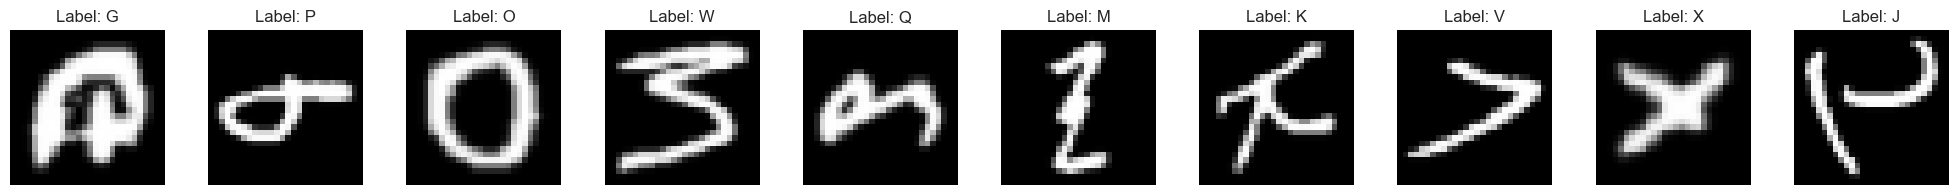

In [20]:
# Define the show_images function
def show_images(x, y, num_images):
    # number of rows and columns of the grid 
    num_cols = num_images
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(num_cols * 2, num_rows * 2))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        # Reshape and plot the image
        plt.imshow(x.iloc[i].values.reshape(28, 28), cmap='gray')
        # Convert numeric label to alphabet and display
        label_as_char = mapping_dict[y.iloc[i, 0]]  # Map to letter
        plt.title(f"Label: {label_as_char}")  
        plt.axis('off')  # Remove axis ticks and labels

    plt.tight_layout()  
    plt.show() 

# Call the function outside (not inside)
num_images = 10
show_images(X_train.head(num_images), pd.DataFrame(y1).head(num_images), num_images)


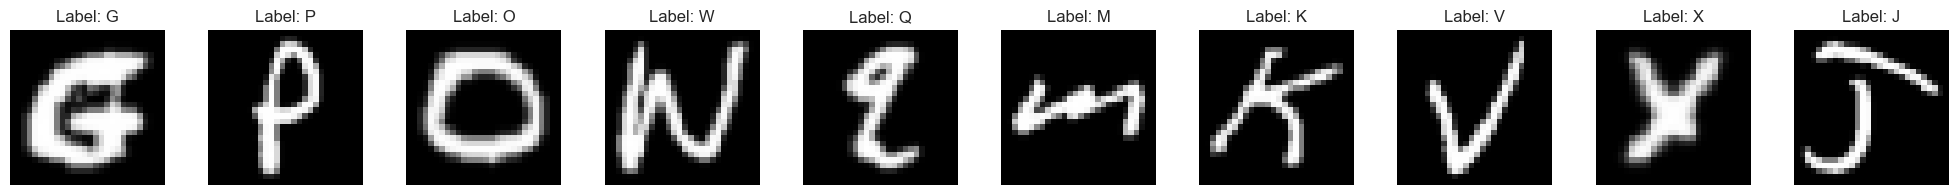

In [21]:
x_df = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
# reset index ensures that the indices are sequential 
# axis 0 means concatination along with rows "vertically stacked"
y_df = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)
y = pd.concat([pd.DataFrame(y1) , pd.DataFrame(y2)], axis=0).reset_index(drop=True)

images = np.array(x_df).reshape(-1, 28, 28)
# -1 is like automatic calculation for the number of images "rows"

images_rotated = np.array([cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) for img in images])
images_mirrored = np.array([cv2.flip(img, 1) for img in images_rotated])
# flipping code = 1 means that the images filpped horizontally 
# like you are reading the data in a reversed order horizontally
# flip code 2 flips the data vertically

# as the result of the flipped data is 3D, we need to faltten the data back into 2D
images_flat = images_mirrored.reshape(images_mirrored.shape[0], -1)

df = pd.DataFrame(images_flat)

num_images = 10
show_images(df.head(num_images), y.head(num_images), num_images)
#df.insert(0, 'Label', y)

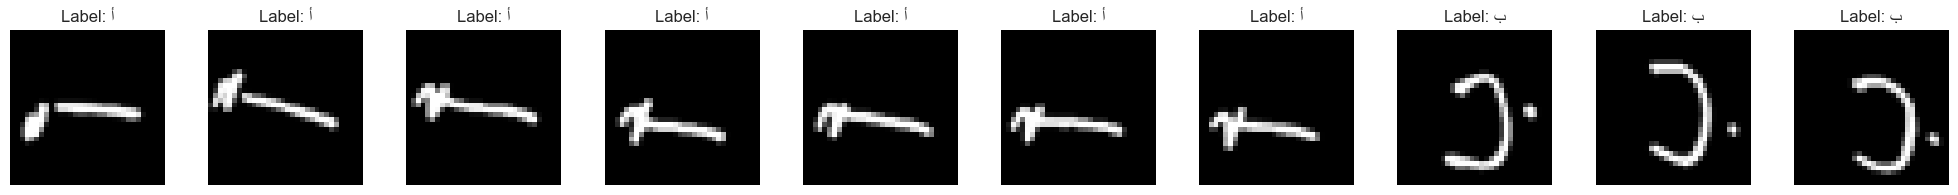

In [153]:
font_path = "C:/Windows/Fonts/arial.ttf"
arabic_font = fm.FontProperties(fname=font_path)

def show_images(x, y, num_images):
    num_cols = num_images
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(num_cols * 2, num_rows * 2))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        
        # Reshape and plot the image
        plt.imshow(x.iloc[i].values.reshape(32, 32), cmap='gray')
        
        # Map numeric label to Arabic letter
        label_index = int(y.iloc[i, 0]) -1  # Convert label to integer
        arabic_letter = arabic_labels[label_index]  # Get corresponding Arabic letter
        
        # Set title with the Arabic label using the Arabic-compatible font
        plt.title(f"Label: {arabic_letter}", fontsize=10, fontproperties=arabic_font)
        
        # Remove axes for cleaner visuals
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Show the first 10 images with Arabic labels
num_images = 10
show_images(X_train_arabic.head(num_images), y_train_arabic.head(num_images), num_images)

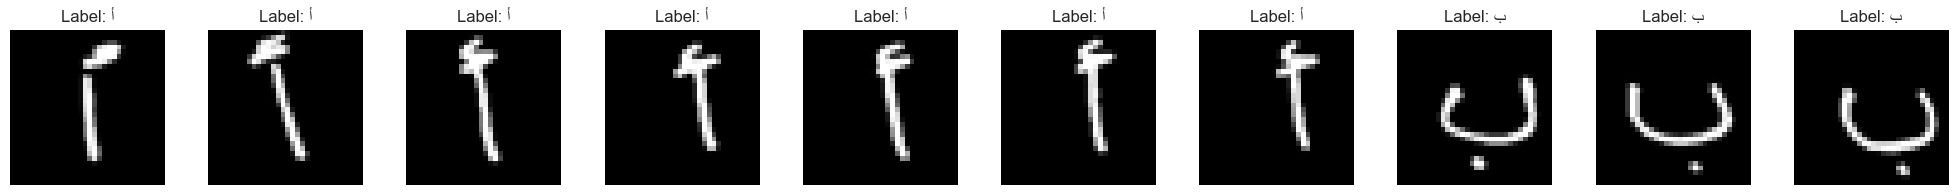

In [154]:
x_df = pd.concat([X_train_arabic, X_test_arabic], axis=0).reset_index(drop=True)
y_df = pd.concat([y_train_arabic, y_test_arabic], axis=0).reset_index(drop=True)
y = pd.concat([pd.DataFrame(y1_arabic) , pd.DataFrame(y2_arabic)], axis=0).reset_index(drop=True)

images = np.array(x_df).reshape(-1, 32, 32)
images_rotated = np.array([cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) for img in images])
images_mirrored = np.array([cv2.flip(img, 1) for img in images_rotated])

images_flat = images_mirrored.reshape(images_mirrored.shape[0], -1)

df = pd.DataFrame(images_flat)

# Show the first 10 images after preprocessing (mirrored and rotated)
num_images = 10
show_images(df.head(num_images), y.head(num_images), num_images)

In [155]:
print(y_test)
print(y_test_arabic)

        0
0       1
1       1
2       1
3       1
4       1
...    ..
14794  19
14795  19
14796  19
14797  19
14798  19

[14799 rows x 1 columns]
       0
0      1
1      2
2      2
3      3
4      3
...   ..
3354  26
3355  27
3356  27
3357  28
3358  28

[3359 rows x 1 columns]


### Interpolation Explanation in Image Resizing

When you **resize an image**, the **pixels** need to be recalculated. **Interpolation** is the process of estimating these new pixels.

<span style="color: #FFA500;">✨ <strong>For upsampling</strong>:</span>
- Interpolation <span style="color: #32CD32;">guesses</span> the new pixel values to enlarge the image.

<span style="color: #FFA500;">✨ <strong>For downsampling</strong>:</span>
- Interpolation <span style="color: #FF6347;">combines</span> or <span style="color: #FF6347;">averages</span> neighboring pixel values to shrink the image.

---

_**Note**: The interpolation method used (e.g., <code>cv2.INTER_LINEAR</code>) influences how these pixels are estimated._

In [26]:
def preprocess_images(images):

    resized_images = np.array([resize_to_32x32(img) for img in images])
    images_rotated = np.array([cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) for img in resized_images])
    images_mirrored = np.array([cv2.flip(img, 1) for img in images_rotated])
    images_flat = images_mirrored.reshape(images_mirrored.shape[0], -1)
    
    return images_flat


def resize_to_32x32(image):
    return cv2.resize(image, (32, 32), interpolation=cv2.INTER_LINEAR)

In [27]:
images_train = X_train.values.reshape(-1, 28, 28)
df_train_processed = pd.DataFrame(preprocess_images(images_train))

images_test = X_test.values.reshape(-1, 28, 28)
df_test_processed = pd.DataFrame(preprocess_images(images_test))

In [29]:
images_train = X_train.values.reshape(-1, 28, 28)
images_resized_train = np.array([resize_to_32x32(img) for img in images_train])
print(images_resized_train.shape)
print (images_resized_train.shape[0])
# flatten the data after reshaping
images_flat_train = images_resized_train.reshape(images_resized_train.shape[0], -1)
df_train = pd.DataFrame(images_flat_train)


images_test = X_test.values.reshape(-1, 28, 28)
images_resized_test = np.array([resize_to_32x32(img) for img in images_test])

images_flat_test = images_resized_test.reshape(images_resized_test.shape[0], -1)
df_test = pd.DataFrame(images_flat_test)

(88799, 32, 32)
88799


In [ ]:
print(df_train.shape)
print(df_test.shape)

(88799, 1024)
(14799, 1024)


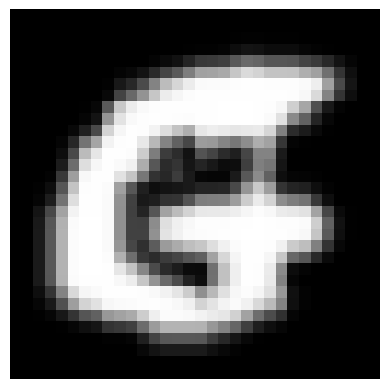

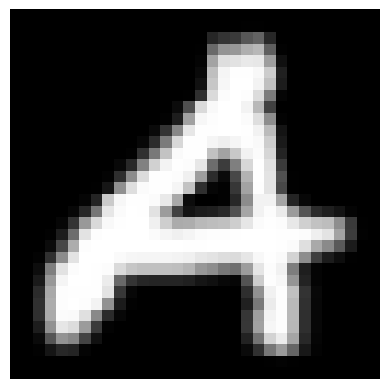

In [63]:
def show_image(image_data):
    # Reshape the image back to (32, 32)
    image = image_data.reshape(32, 32)
    
    # Plot the image
    plt.imshow(image, cmap='gray')  # 'gray' for grayscale images
    plt.axis('off')  # Hide axis
    plt.show()

# Show the first image from df_train
show_image(df_train_processed.iloc[0].values)

# Alternatively, you can show any other image by changing the index
# Example: show the 10th image
show_image(df_test_processed.iloc[8].values)

In [64]:
df_train_reshaped = np.reshape(df_train.values, (-1, 32, 32, 1))
df_test_reshaped = np.reshape(df_test.values, (-1, 32, 32, 1))


print(f"Train data shape: {df_train_reshaped.shape}")
print(f"Test data shape: {df_test_reshaped.shape}")


Train data shape: (88799, 32, 32, 1)
Test data shape: (14799, 32, 32, 1)


In [65]:
# Reshape the data
X_train_arabic_reshaped = X_train_arabic.values.reshape(-1, 32, 32, 1)
X_test_arabic_reshaped = X_test_arabic.values.reshape(-1, 32, 32, 1)

# Check the shapes
print("X_train_arabic reshaped shape:", X_train_arabic_reshaped.shape)
print("X_test_arabic reshaped shape:", X_test_arabic_reshaped.shape)


X_train_arabic reshaped shape: (13439, 32, 32, 1)
X_test_arabic reshaped shape: (3359, 32, 32, 1)


In [156]:
offset = 26

y_train_arabic_adjusted = y_train_arabic + offset
y_test_arabic_adjusted = y_test_arabic + offset

# Combine features
X_train_combined = np.vstack((df_train_reshaped, X_train_arabic_reshaped))
X_test_combined = np.vstack((df_test_reshaped, X_test_arabic_reshaped))
# vstack is just a function combine arrays into a single array by vertically stacking them

# Combine labels
y_train_combined = np.vstack((y_train, y_train_arabic_adjusted))
y_test_combined = np.vstack((y_test, y_test_arabic_adjusted))

# Outputs for verification
print("X_train_combined shape:", X_train_combined.shape)z
print("y_train_combined shape:", y_train_combined.shape)
print("X_test_combined shape:", X_test_combined.shape)
print("y_test_combined shape:", y_test_combined.shape)

X_train_combined shape: (102238, 32, 32, 1)
y_train_combined shape: (102238, 1)
X_test_combined shape: (18158, 32, 32, 1)
y_test_combined shape: (18158, 1)


In [157]:
# Shuffle training data
X_train_shuffled, y_train_shuffled = shuffle(X_train_combined, y_train_combined, random_state=42)

# Shuffle testing data
X_test_shuffled, y_test_shuffled = shuffle(X_test_combined, y_test_combined, random_state=42)

# Outputs for verification
print("X_train_shuffled shape:", X_train_shuffled.shape)
print("y_train_shuffled shape:", y_train_shuffled.shape)
print("X_test_shuffled shape:", X_test_shuffled.shape)
print("y_test_shuffled shape:", y_test_shuffled.shape)

X_train_shuffled shape: (102238, 32, 32, 1)
y_train_shuffled shape: (102238, 1)
X_test_shuffled shape: (18158, 32, 32, 1)
y_test_shuffled shape: (18158, 1)


In [66]:
sorted_unique_values = sorted(pd.DataFrame(y_test_shuffled)[0].unique())
print(*sorted_unique_values)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54


# 🔢 <span style="color: #007ACC;">Label Encoding and Class Weight Calculation</span>  

This code handles two crucial steps for processing labels:  

### 🎯 <span style="color: #2ECC71;">1. Label Encoding:</span>  
- Converts categorical labels into a binary matrix (**one-hot encoding**).  
- Uses a predefined list of all possible classes for **consistent encoding**, ensuring no class is overlooked, even if absent in the current dataset.  

### ⚖️ <span style="color: #F39C12;">2. Class Weight Calculation:</span>  
- Tackles class imbalances by assigning **higher weights to underrepresented classes**, balancing their impact during training.  

### 🌟 <span style="color: #8E44AD;">Why Use This Approach?</span>  
- Defining all classes ensures a **consistent and robust dataset** across different splits or datasets.  
- Especially helpful in scenarios where some classes might not appear in a specific subset of data.  

In [61]:
def process_labels_and_weights(y, all_classes):

    y = y.ravel()
    le = LabelBinarizer()
    le.fit(all_classes)
    
    labels = le.transform(y)
    
    classTotals = labels.sum(axis=0)
    classWeight = {}
    for i in range(len(all_classes)):
        classWeight[i] = classTotals.max() / classTotals[i] if classTotals[i] > 0 else 1
    
    return labels, classWeight

In [57]:
# def process_labels_and_weights(y):

#     le = LabelBinarizer()
#     labels = le.fit_transform(y)
#     classTotals = labels.sum(axis=0)
#     classWeight = {}
#     for i in range(0, len(classTotals)):
#         classWeight[i] = classTotals.max() / classTotals[i]
    
#     return labels, classWeight

In [63]:
# Define the all_classes list (range from 1 to 55, assuming the classes are 1-indexed)
all_classes = list(range(1, 55))

# Call the function for y_train_shuffled and y_test_shuffled
y_train_labels, y_train_class_weights = process_labels_and_weights(y_train_shuffled, all_classes)
y_test_labels, y_test_class_weights = process_labels_and_weights(y_test_shuffled, all_classes)

# Print the shapes and class weights for verification
print("y_train_labels Shape:", y_train_labels.shape)  # Should match number of training samples and number of classes

print("y_test_labels Shape:", y_test_labels.shape)  # Should match number of testing samples and number of classes

y_train_labels Shape: (102238, 54)
y_test_labels Shape: (18158, 54)


In [64]:
# Assuming `labels` is the one-hot encoded array
# Find the indices of columns where all values are zero
zero_columns = np.where(y_test_labels.sum(axis=0) == 0)[0]

# Print the zero columns
print("Columns with all zeros (indices):", zero_columns)

# Map these indices back to the original class labels
# Assuming `all_classes` is the list of class labels
missing_classes = [all_classes[i] for i in zero_columns]
print("Missing classes:", missing_classes)

Columns with all zeros (indices): [19 20 21 22 23 24 25]
Missing classes: [20, 21, 22, 23, 24, 25, 26]


# 🔄 <span style="color: #007ACC;">Data Splitting and Reshaping</span>

This code splits the shuffled training data into training and validation sets:
- **20%** of the data is used for validation, with **stratified splitting** to preserve class distribution.
- A fixed **random seed** ensures reproducibility.

After splitting, the data is reshaped to **32-bit float arrays** (`np.float32`) for compatibility with model input requirements. This step ensures proper data formatting for model training and avoids errors related to incompatible types.

This process ensures smooth integration of the data into machine learning models. 📊

In [71]:
(trainX, valX, trainY, valY) = train_test_split(X_train_shuffled,
	y_train_labels, test_size=0.20, stratify=y_train_labels, random_state=42)

In [73]:
trainX = np.array(trainX, dtype=np.float32)
trainY = np.array(trainY, dtype=np.float32)
valX = np.array(valX, dtype=np.float32)
valY = np.array(valY, dtype=np.float32)
testX = np.array(X_test_shuffled, dtype=np.float32)
testY = np.array(y_test_labels, dtype=np.float32)

In [74]:
pd.DataFrame(y_test_labels).shape

(18158, 54)

In [75]:
trainX_tf = tf.convert_to_tensor(trainX, dtype=tf.float32)
valX_tf = tf.convert_to_tensor(valX, dtype=tf.float32)
testX_tf = tf.convert_to_tensor(testX, dtype=tf.float32)


trainX_32_RGB = tf.image.grayscale_to_rgb(trainX_tf)
valX_32_RGB = tf.image.grayscale_to_rgb(valX_tf)
testX_32_RGB = tf.image.grayscale_to_rgb(testX_tf)

print(f"trainX_rgb shape: {trainX_32_RGB.shape}")
print(f"valX_rgb shape: {valX_32_RGB.shape}")
print(f"testX_rgb shape: {testX_32_RGB.shape}")


trainX_rgb shape: (81790, 32, 32, 3)
valX_rgb shape: (20448, 32, 32, 3)
testX_rgb shape: (18158, 32, 32, 3)


In [75]:
# Resize to 64x64
trainX_64 = tf.image.resize(trainX, (64, 64))
trainX_64_RGB = tf.image.grayscale_to_rgb(trainX_64)

valX_64 = tf.image.resize(valX, (64, 64))
valX_64_RGB = tf.image.grayscale_to_rgb(valX_64)

testX_64 = tf.image.resize(testX, (64, 64))
testX_64_RGB = tf.image.grayscale_to_rgb(testX_64)

print(f"trainX_64_RGB shape: {trainX_64_RGB.shape}")
print(f"valX_64_RGB shape: {valX_64_RGB.shape}")
print(f"testX_64_RGB shape: {testX_64_RGB.shape}")

trainX_64_RGB shape: (81790, 64, 64, 3)
valX_64_RGB shape: (20448, 64, 64, 3)
testX_64_RGB shape: (18158, 64, 64, 3)


In [104]:
# Resize to 71x71
trainX_71 = tf.image.resize(trainX, (71, 71))
trainX_71_RGB = tf.image.grayscale_to_rgb(trainX_71)

valX_71 = tf.image.resize(valX, (71, 71))
valX_71_RGB = tf.image.grayscale_to_rgb(valX_71)

testX_71 = tf.image.resize(testX, (71, 71))
testX_71_RGB = tf.image.grayscale_to_rgb(testX_71)

print(f"trainX_71_RGB shape: {trainX_71_RGB.shape}")
print(f"valX_71_RGB shape: {valX_71_RGB.shape}")
print(f"testX_71_RGB shape: {testX_71_RGB.shape}")

trainX_71_RGB shape: (81790, 71, 71, 3)
valX_71_RGB shape: (20448, 71, 71, 3)
testX_71_RGB shape: (18158, 71, 71, 3)


In [175]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [127]:
def plot_confusion_matrix(cm, labels, title):
    """
    Function to plot the confusion matrix with custom labels.
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(include_values=True, cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
    ax.set_title(title, fontsize=16)
    plt.show()

def plot_large_confusion_matrix(y_true, y_pred, model_name):
    """
    Function to split and plot confusion matrices for English and Arabic alphabets.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    # Define number of classes
    num_english_classes = 26  # A-Z
    num_arabic_classes = 28   # Arabic letters

    # Split the confusion matrix into English and Arabic parts
    cm_english = cm[:num_english_classes, :num_english_classes]
    cm_arabic = cm[num_english_classes:, num_english_classes:]
    
    # Define English and Arabic alphabet labels
    english_alphabet = [chr(i) for i in range(65, 91)]  # A-Z
    arabic_alphabet = [
        "أ", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص",
        "ض", "ط", "ظ", "ع", "غ", "ف", "ق", "ك", "ل", "م", "ن", "ه", "و", "ي"
    ]
    
    # Plot confusion matrices for English and Arabic
    plot_confusion_matrix(cm_english, english_alphabet, f'{model_name} - English Alphabet')
    plot_confusion_matrix(cm_arabic, arabic_alphabet, f'{model_name} - Arabic Alphabet')

In [77]:
from sklearn.metrics import classification_report

def display_classification_report(y_true, y_pred, model_name):
    
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_true, y_pred))


In [78]:
def evaluate_predictions(model, valX, valY):
    
    y_pred_probs = model.predict(valX)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(valY, axis=1)
    
    return y_true, y_pred

In [79]:
def call_confusion_matrix(model, valX, valY, model_name):
    y_true, y_pred = evaluate_predictions(model, valX, valY)
    plot_large_confusion_matrix(y_true, y_pred, model_name)

In [80]:
def call_classification_report(model, valX, valY, model_name):
    y_true, y_pred = evaluate_predictions(model, valX, valY)
    display_classification_report(y_true, y_pred, model_name)

In [99]:

def plot_roc(y_true, y_pred_probs, max_classes=26, x_lim=(0.0, 1.0), y_lim=(0.0, 1.05)):
    """
    Plots the ROC curve for multi-class classification.
    
    Parameters:
        y_true (array-like): Ground truth labels.
        y_pred_probs (array-like): Predicted probabilities for each class.
        max_classes (int): Maximum number of classes to include in the plot.
        x_lim (tuple): Limits for the x-axis (default is (0.0, 1.0)).
        y_lim (tuple): Limits for the y-axis (default is (0.0, 1.05)).
    """
    # Convert y_true to binary format for multi-class ROC
    y_true_binary = label_binarize(y_true, classes=np.unique(y_true))
    n_classes = y_true_binary.shape[1]
    
    plt.figure(figsize=(14, 10))
    
    # Plot for the specified number of classes
    for i in range(min(max_classes, n_classes)):
        fpr, tpr, _ = roc_curve(y_true_binary[:, i], y_pred_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
    
    # Add diagonal line
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title("ROC Curve for Multi-Class Classification", fontsize=16)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# 🖼️ <span style="color: #007ACC;">Image Augmentation with `ImageDataGenerator`</span>

This code defines an **ImageDataGenerator** object (`aug`) that applies various augmentation techniques to images, which helps improve the robustness and generalization ability of a machine learning model. The following transformations are applied:

### 1. **Rotation (`rotation_range=20`)**  
- Randomly rotates the image by up to **20 degrees**.

### 2. **Width Shift (`width_shift_range=0.2`)**  
- Randomly shifts the image horizontally by **up to 20%** of the image width.

### 3. **Height Shift (`height_shift_range=0.2`)**  
- Randomly shifts the image vertically by **up to 20%** of the image height.

### 4. **Shear (`shear_range=0.2`)**  
- Applies **shear transformations** to the image, changing its shape slightly by **up to 20%**.

### 5. **Zoom (`zoom_range=0.2`)**  
- Randomly zooms in or out on the image by **up to 20%**.

### 6. **Horizontal Flip (`horizontal_flip=True`)**  
- Randomly flips the image horizontally, which helps with learning invariant features.

### 7. **Fill Mode (`fill_mode="nearest"`)**  
- When pixels are shifted during the transformations, this specifies how to fill in the empty areas. In this case, it uses the **nearest pixel** to fill the gaps.

---

This augmentation process enhances the dataset by artificially generating variations of the images, improving model performance by exposing it to more diverse data. 📈

In [70]:
aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [78]:
class ResNet:
    @staticmethod
    def residual_module(data, K, stride, chanDim, red=False, reg=0.0001, bnEps=2e-5, bnMom=0.9):
        shortcut = data  # The shortcut branch is the identity (input)

        # First block of 1x1 CONVs
        bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(data)
        act1 = Activation("relu")(bn1)
        conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False, kernel_regularizer=l2(reg))(act1)

        # Second block of 3x3 CONVs
        bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(conv1)
        act2 = Activation("relu")(bn2)
        conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride, padding="same", use_bias=False, kernel_regularizer=l2(reg))(act2)

        # Third block of 1x1 CONVs
        bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(conv2)
        act3 = Activation("relu")(bn3)
        conv3 = Conv2D(K, (1, 1), use_bias=False, kernel_regularizer=l2(reg))(act3)

        # If reduction is needed, apply a CONV layer to the shortcut
        if red:
            shortcut = Conv2D(K, (1, 1), strides=stride, use_bias=False, kernel_regularizer=l2(reg))(act1)

        # Add the shortcut to the final CONV result
        x = Add()([conv3, shortcut])
        return x

    @staticmethod
    def build(width, height, depth, classes, stages, filters, reg=0.0001, bnEps=2e-5, bnMom=0.9, dataset="cifar"):
        inputShape = (height, width, depth)
        chanDim = -1

        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)
            chanDim = 1

        inputs = Input(shape=inputShape)
        x = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(inputs)

        if dataset == "cifar":
            x = Conv2D(filters[0], (3, 3), use_bias=False, padding="same", kernel_regularizer=l2(reg))(x)

        elif dataset == "tiny_imagenet":
            x = Conv2D(filters[0], (5, 5), use_bias=False, padding="same", kernel_regularizer=l2(reg))(x)
            x = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(x)
            x = Activation("relu")(x)
            x = ZeroPadding2D((1, 1))(x)
            x = MaxPooling2D((3, 3), strides=(2, 2))(x)

        for i in range(len(stages)):
            stride = (1, 1) if i == 0 else (2, 2)
            x = ResNet.residual_module(x, filters[i + 1], stride, chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

            for j in range(stages[i] - 1):
                x = ResNet.residual_module(x, filters[i + 1], (1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)

        x = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(x)
        x = Activation("relu")(x)
        x = AveragePooling2D((8, 8))(x)

        x = Flatten()(x)
        x = Dense(classes, kernel_regularizer=l2(reg))(x)
        x = Activation("softmax")(x)

        model = Model(inputs, x, name="resnet")
        return model

In [95]:
EPOCHS = 20
INIT_LR = 1e-1
BS = 128

In [80]:
# Build the ResNet model
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

height, width, depth = 32, 32, 3
classes = 54
stages = [2, 2, 2]
filters = [16, 32, 64, 128]

model = ResNet.build(width, height, depth, classes, stages, filters, dataset="cifar")

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history_model1 = model.fit(
    aug.flow(trainX_32_RGB, trainY, batch_size=BS),
    validation_data=(valX_32_RGB, valY),
    steps_per_epoch=len(trainX_32_RGB) // 32,
    epochs=EPOCHS,
    verbose=1
)

c:\Users\user\Anaconda3\envs\pythonConda\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
c:\Users\user\Anaconda3\envs\pythonConda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 639/2555 ━━━━━━━━━━━━━━━━━━━━ 9:09 287ms/step - accuracy: 0.1245 - loss: 3.4121

c:\Users\user\Anaconda3\envs\pythonConda\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2555/2555 ━━━━━━━━━━━━━━━━━━━━ 204s 75ms/step - accuracy: 0.1819 - loss: 3.1275 - val_accuracy: 0.3365 - val_loss: 2.3968
Epoch 2/20
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 182s 71ms/step - accuracy: 0.4632 - loss: 1.9516 - val_accuracy: 0.5522 - val_loss: 1.5640
Epoch 3/20
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 167s 65ms/step - accuracy: 0.5885 - loss: 1.4609 - val_accuracy: 0.6339 - val_loss: 1.2367
Epoch 4/20
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 160s 63ms/step - accuracy: 0.6592 - loss: 1.2008 - val_accuracy: 0.6482 - val_loss: 1.1571
Epoch 5/20
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 162s 63ms/step - accuracy: 0.7058 - loss: 1.0336 - val_accuracy: 0.7763 - val_loss: 0.8105
Epoch 6/20
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 168s 66ms/step - accuracy: 0.7401 - loss: 0.9208 - val_accuracy: 0.7649 - val_loss: 0.8335
Epoch 7/20
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 182s 71ms/step - accuracy: 0.7639 - loss: 0.8429 - val_accuracy: 0.7975 - val_loss: 0.7188
Epoch 8/20
2555/2555 ━━━━━━━━━━━━━━━━━━━━ 163s 64ms/step - accuracy: 0.7825 - lo

In [93]:
model = tf.keras.models.load_model("model.keras")

639/639 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step
639/639 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step


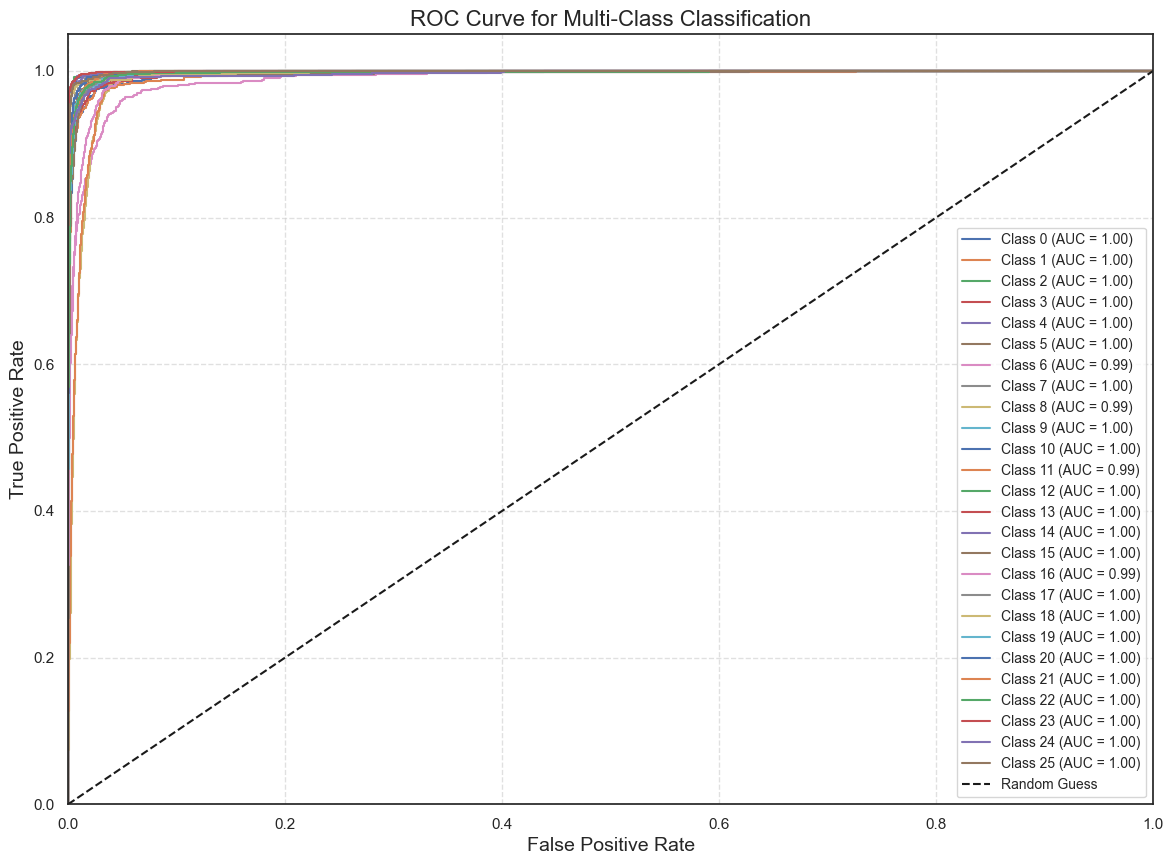

In [126]:
# Assuming valX_32_RGB and valY are defined earlier in the code
y_true, y_pred = evaluate_predictions(model, valX_32_RGB, valY)
y_pred_probs = model.predict(valX_32_RGB)

# Use y_true and y_pred_probs for plotting the ROC curve
plot_roc(y_true, y_pred_probs, max_classes=26, x_lim=(0.0, 1.0), y_lim=(0.0, 1.05))

In [96]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(testX_32_RGB, testY, batch_size=BS, verbose=1)

# Print the evaluation results
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

#model.save("model.keras")

142/142 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.8646 - loss: 0.5214
Test Loss: 0.516140341758728
Test Accuracy: 0.8679920434951782


639/639 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step


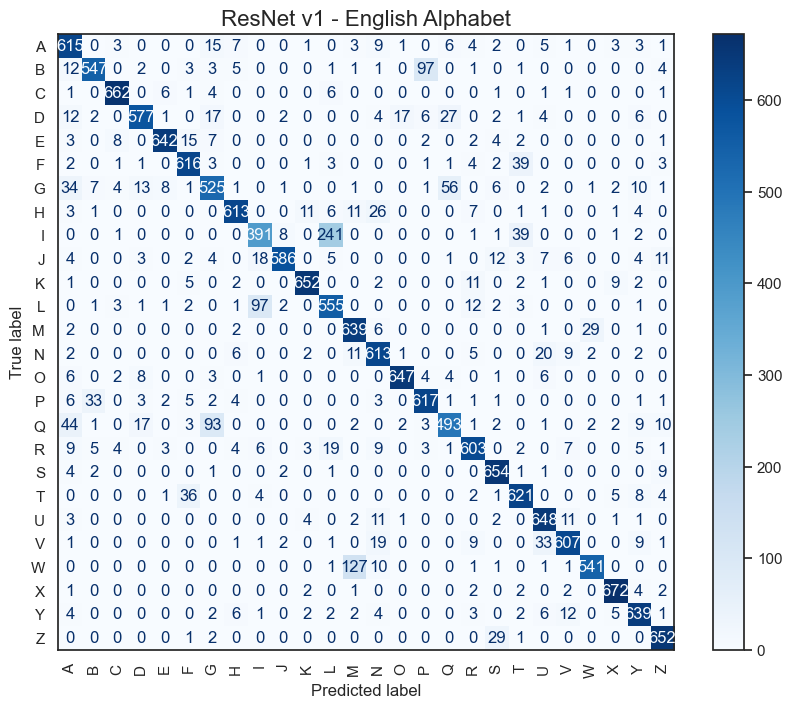

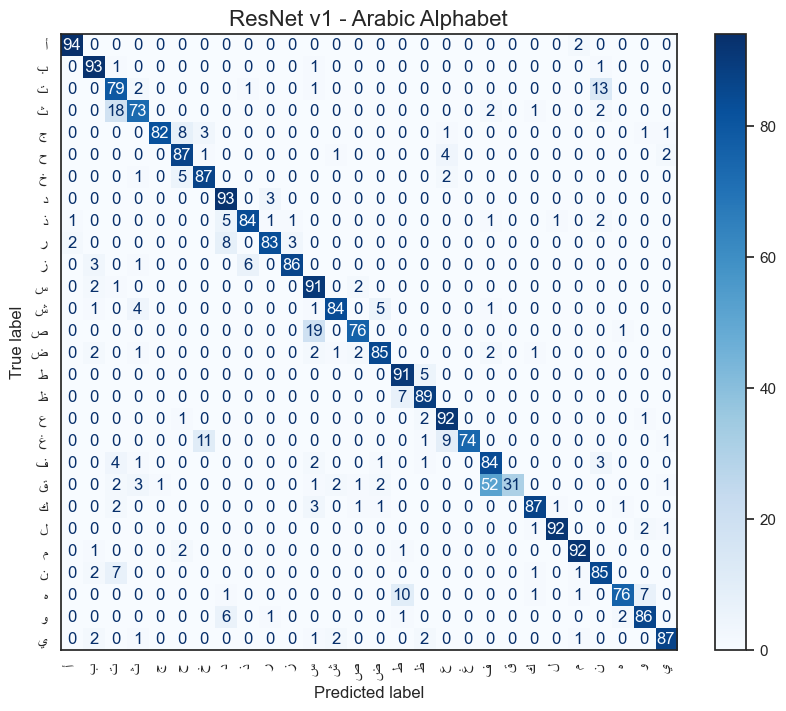

In [128]:
call_confusion_matrix(model, valX_32_RGB, valY, 'ResNet v1')

In [197]:
call_classification_report(model, valX_32_RGB, valY, 'ResNet v1')

639/639 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step
Classification Report for ResNet v1:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       679
           1       0.93      0.79      0.85       679
           2       0.96      0.97      0.97       684
           3       0.92      0.86      0.89       680
           4       0.97      0.93      0.95       687
           5       0.88      0.92      0.90       679
           6       0.78      0.77      0.77       677
           7       0.93      0.89      0.91       685
           8       0.76      0.57      0.65       686
           9       0.97      0.85      0.91       680
          10       0.95      0.95      0.95       688
          11       0.66      0.82      0.73       683
          12       0.81      0.94      0.87       680
          13       0.86      0.91      0.88       673
          14       0.97      0.94      0.95       682
          15       0.84      0.89      0.86       686
 

In [121]:
aug2 = ImageDataGenerator(
    rotation_range=10,  # Reduce rotation range to prevent drastic changes
    width_shift_range=0.1,  # Moderate width shift
    height_shift_range=0.1,  # Moderate height shift
    shear_range=0.2,  # Light shearing to avoid distortion
    zoom_range=0.2,  # Allow zooming, but not too much
    horizontal_flip=False,  # Avoid flipping to maintain correct orientation
    fill_mode="nearest"
)

In [119]:
trainX_71_RGB_augmented = aug.flow(trainX_71_RGB, trainY, batch_size=32)

In [122]:
from tensorflow.keras.callbacks import EarlyStopping
base_model = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))

base_model.trainable = False

inputs = Input(shape=(71, 71, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(54, activation='softmax')(x)

modelFunXception = Model(inputs, outputs)

modelFunXception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelFunXception.summary()

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=3,
                               restore_best_weights=True)

historyFunXception = modelFunXception.fit(
    aug2.flow(trainX_71_RGB, trainY, batch_size=32),
    validation_data=(valX_71_RGB, valY),
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)


loss, accuracy = modelFunXception.evaluate(testX_71_RGB, testY)
print(f"Test Accuracy: {accuracy:.2f}")
loss, accuracy = modelFunXception.evaluate(valX_71_RGB, valY)
print(f"Validation Accuracy: {accuracy:.2f}")

modelFunXception.save("XceptionFun.keras")

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 71, 71, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 3, 3, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 54)             │         6,966 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,130,718 (80.61 MB)

 Trainable params: 269,238 (1.03 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/10


c:\Users\user\Anaconda3\envs\pythonConda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2556/2556 ━━━━━━━━━━━━━━━━━━━━ 542s 210ms/step - accuracy: 0.5184 - loss: 1.7079 - val_accuracy: 0.7518 - val_loss: 0.8015
Epoch 2/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 506s 198ms/step - accuracy: 0.7219 - loss: 0.8969 - val_accuracy: 0.7916 - val_loss: 0.6549
Epoch 3/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 484s 189ms/step - accuracy: 0.7493 - loss: 0.7895 - val_accuracy: 0.8040 - val_loss: 0.6156
Epoch 4/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 473s 185ms/step - accuracy: 0.7679 - loss: 0.7291 - val_accuracy: 0.8118 - val_loss: 0.5801
Epoch 5/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 473s 185ms/step - accuracy: 0.7856 - loss: 0.6769 - val_accuracy: 0.8253 - val_loss: 0.5360
Epoch 6/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 473s 185ms/step - accuracy: 0.7928 - loss: 0.6444 - val_accuracy: 0.8187 - val_loss: 0.5652
Epoch 7/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 476s 186ms/step - accuracy: 0.7988 - loss: 0.6271 - val_accuracy: 0.8228 - val_loss: 0.5468
Epoch 8/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 482s 189ms/step - accuracy: 0.8

639/639 ━━━━━━━━━━━━━━━━━━━━ 102s 160ms/step


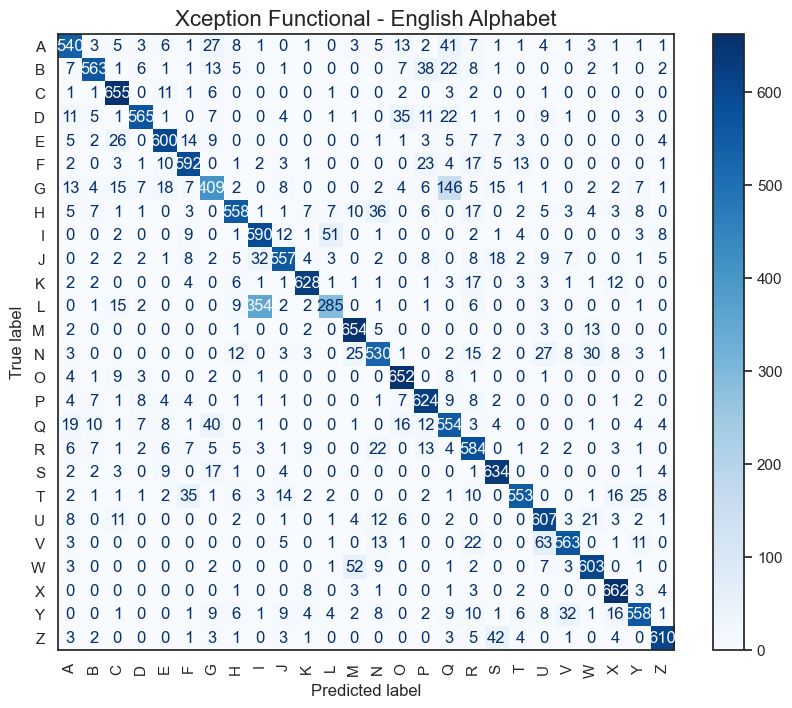

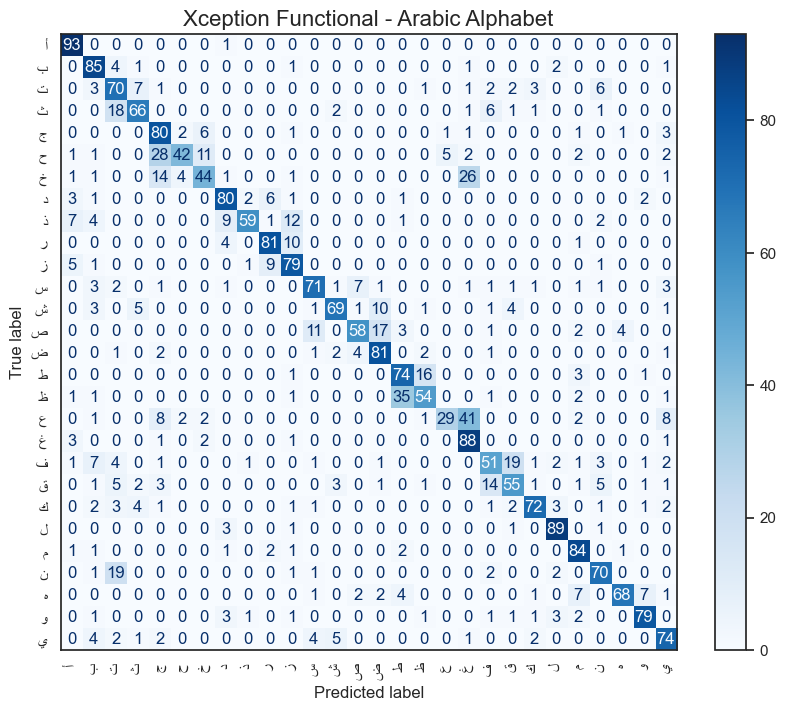

In [129]:
call_confusion_matrix(modelFunXception, valX_71_RGB, valY, 'Xception Functional')

In [199]:
call_classification_report(modelFunXception, valX_71_RGB, valY, 'Xception Functional')

639/639 ━━━━━━━━━━━━━━━━━━━━ 116s 182ms/step
Classification Report for Xception Functional:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       679
           1       0.78      0.91      0.84       679
           2       0.92      0.92      0.92       684
           3       0.88      0.89      0.88       680
           4       0.81      0.92      0.86       687
           5       0.86      0.87      0.86       679
           6       0.74      0.55      0.63       677
           7       0.88      0.83      0.85       685
           8       0.63      0.83      0.71       686
           9       0.93      0.84      0.88       680
          10       0.95      0.90      0.93       688
          11       0.76      0.52      0.61       683
          12       0.87      0.96      0.92       680
          13       0.81      0.79      0.80       673
          14       0.93      0.92      0.93       682
          15       0.84      0.93      0.89

639/639 ━━━━━━━━━━━━━━━━━━━━ 109s 170ms/step
639/639 ━━━━━━━━━━━━━━━━━━━━ 101s 158ms/step


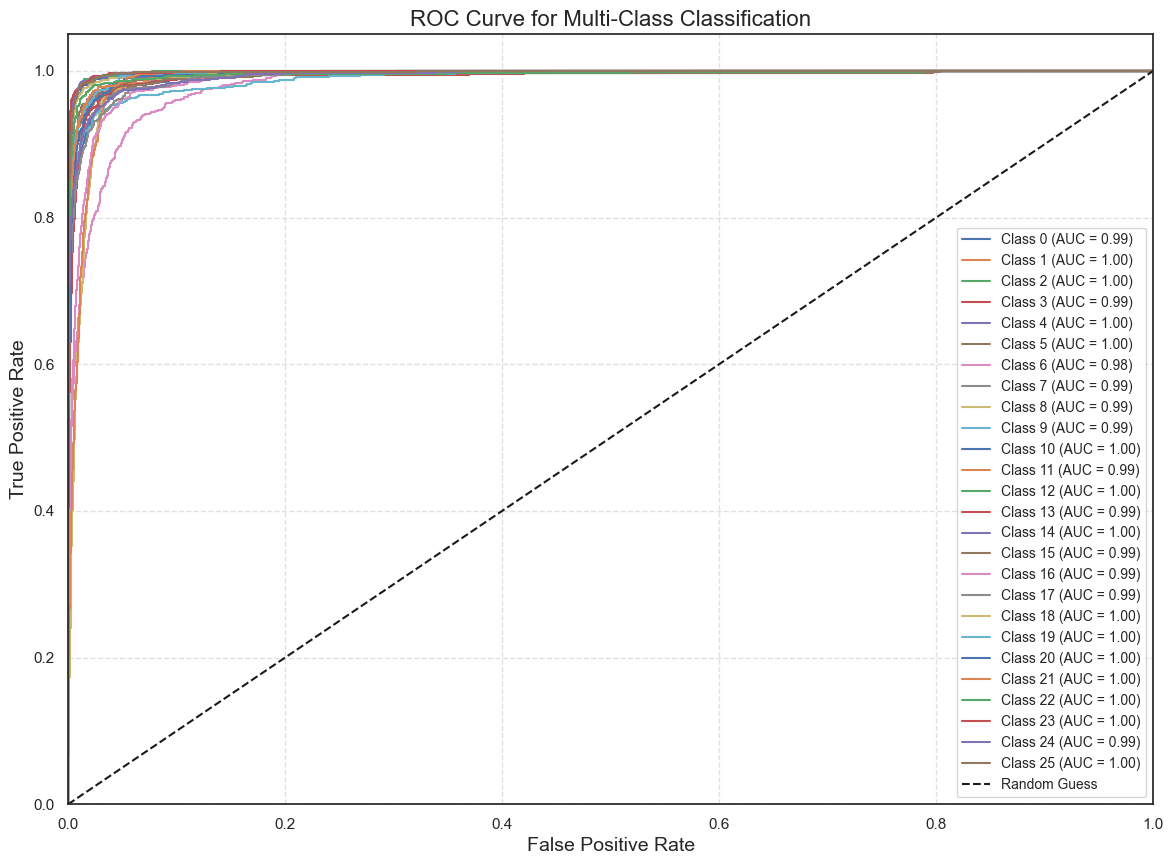

In [124]:
# Generate predictions and ground truth labels
y_true, y_pred = evaluate_predictions(modelFunXception, valX_71_RGB, valY)

# Generate predicted probabilities
y_pred_probs = modelFunXception.predict(valX_71_RGB)

# Plot the ROC curve for the first 26 classes
plot_roc(y_true, y_pred_probs, max_classes=26, x_lim=(0.0, 1.0), y_lim=(0.0, 1.05))

In [116]:
densenet = DenseNet121(
    weights='imagenet',  # Using ImageNet pre-trained weights
    include_top=False,  # Exclude the top (classification) layer
    input_shape=(71, 71, 3)  # Set your desired input shape
)

# Freeze the pre-trained layers
densenet.trainable = False

# Build the model
modelDense = Sequential()
modelDense.add(densenet)
modelDense.add(layers.GlobalAveragePooling2D())  # Pooling to reduce the spatial dimensions
modelDense.add(layers.Dense(54, activation='softmax'))  # Change the number of classes as needed

# Compile the model
modelDense.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Model summary
modelDense.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 2, 2, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 54)             │        55,350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,092,854 (27.06 MB)

 Trainable params: 55,350 (216.21 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [117]:
historyDense = modelDense.fit(
    aug2.flow(trainX_71_RGB, trainY, batch_size=32),  # Train data with augmentation
    validation_data=(valX_71_RGB, valY),  # Validation data
    epochs=10,
    batch_size=32
)

# Evaluate the model
loss, accuracy = modelDense.evaluate(testX_71_RGB, testY)
print(f"Validation Accuracy: {accuracy:.2f}")

Epoch 1/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 327s 122ms/step - accuracy: 0.5686 - loss: 1.5747 - val_accuracy: 0.7961 - val_loss: 0.6673
Epoch 2/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 323s 126ms/step - accuracy: 0.7748 - loss: 0.7243 - val_accuracy: 0.8319 - val_loss: 0.5408
Epoch 3/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 307s 120ms/step - accuracy: 0.8013 - loss: 0.6376 - val_accuracy: 0.8416 - val_loss: 0.5073
Epoch 4/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 307s 120ms/step - accuracy: 0.8126 - loss: 0.5922 - val_accuracy: 0.8342 - val_loss: 0.5218
Epoch 5/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 325s 127ms/step - accuracy: 0.8189 - loss: 0.5737 - val_accuracy: 0.8502 - val_loss: 0.4624
Epoch 6/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 306s 120ms/step - accuracy: 0.8259 - loss: 0.5506 - val_accuracy: 0.8554 - val_loss: 0.4521
Epoch 7/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 304s 119ms/step - accuracy: 0.8303 - loss: 0.5364 - val_accuracy: 0.8625 - val_loss: 0.4325
Epoch 8/10
2556/2556 ━━━━━━━━━━━━━━━━━━━━ 304s 119ms/step - ac

In [125]:
loss, accuracy = modelDense.evaluate(valX_64_RGB, valY)
print(f"Validation Accuracy: {accuracy:.2f}")

639/639 ━━━━━━━━━━━━━━━━━━━━ 62s 97ms/step - accuracy: 0.7221 - loss: 0.9070
Validation Accuracy: 0.73


In [118]:
modelDense.save("modelDense.keras")

639/639 ━━━━━━━━━━━━━━━━━━━━ 72s 113ms/step


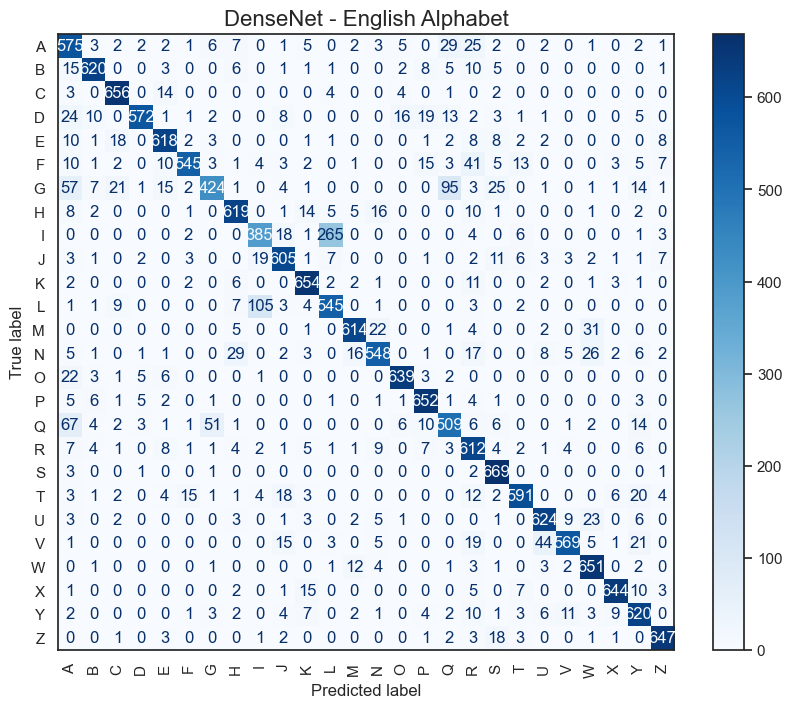

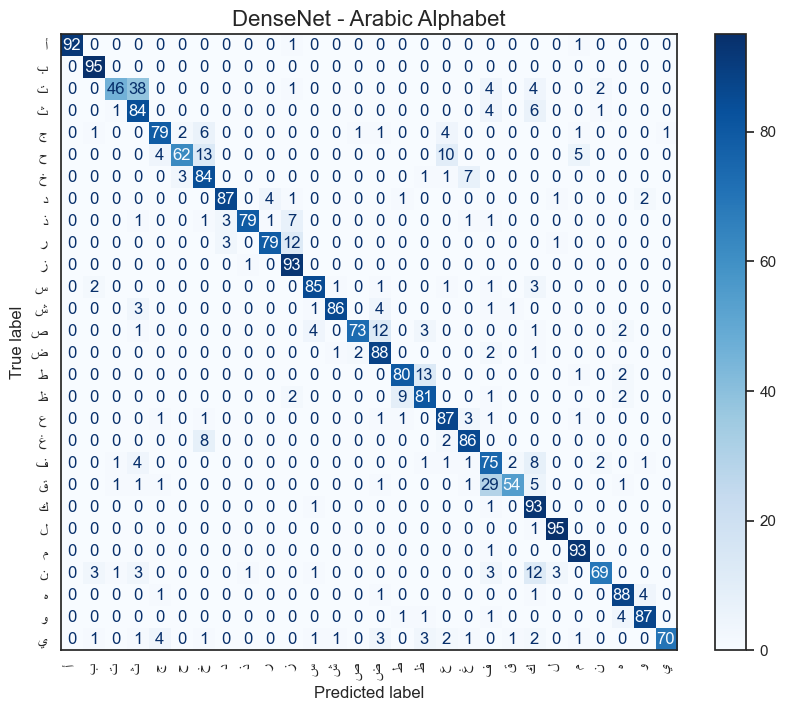

In [130]:
call_confusion_matrix(modelDense, valX_71_RGB, valY, 'DenseNet')

In [201]:
call_classification_report(modelDense, valX_71_RGB, valY, 'DenseNet')

639/639 ━━━━━━━━━━━━━━━━━━━━ 85s 133ms/step
Classification Report for DenseNet:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75       679
           1       0.94      0.90      0.92       679
           2       0.92      0.96      0.94       684
           3       0.96      0.84      0.90       680
           4       0.91      0.89      0.90       687
           5       0.94      0.81      0.87       679
           6       0.87      0.62      0.72       677
           7       0.89      0.89      0.89       685
           8       0.75      0.57      0.65       686
           9       0.88      0.88      0.88       680
          10       0.90      0.95      0.92       688
          11       0.66      0.81      0.72       683
          12       0.94      0.90      0.92       680
          13       0.88      0.82      0.85       673
          14       0.95      0.94      0.95       682
          15       0.89      0.95      0.92       686
 

In [111]:
modelDense = tf.keras.models.load_model("modelDense.keras")

639/639 ━━━━━━━━━━━━━━━━━━━━ 68s 107ms/step
639/639 ━━━━━━━━━━━━━━━━━━━━ 60s 93ms/step


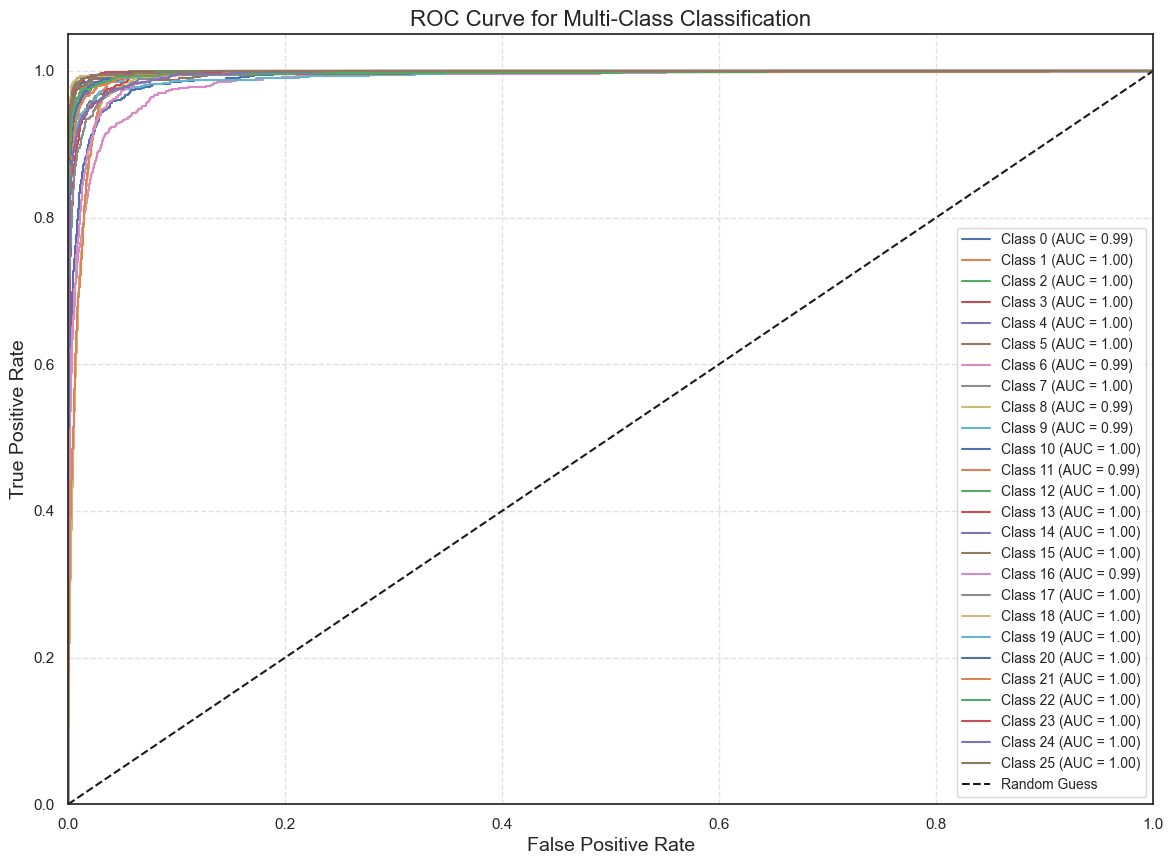

In [125]:
y_true, y_pred = evaluate_predictions(modelDense, valX_71_RGB, valY)
y_pred_probs = modelDense.predict(valX_71_RGB)

# Use y_true and y_pred_probs for plotting the ROC curve
plot_roc(y_true, y_pred_probs, max_classes=26, x_lim=(0.0, 1.0), y_lim=(0.0, 1.05))

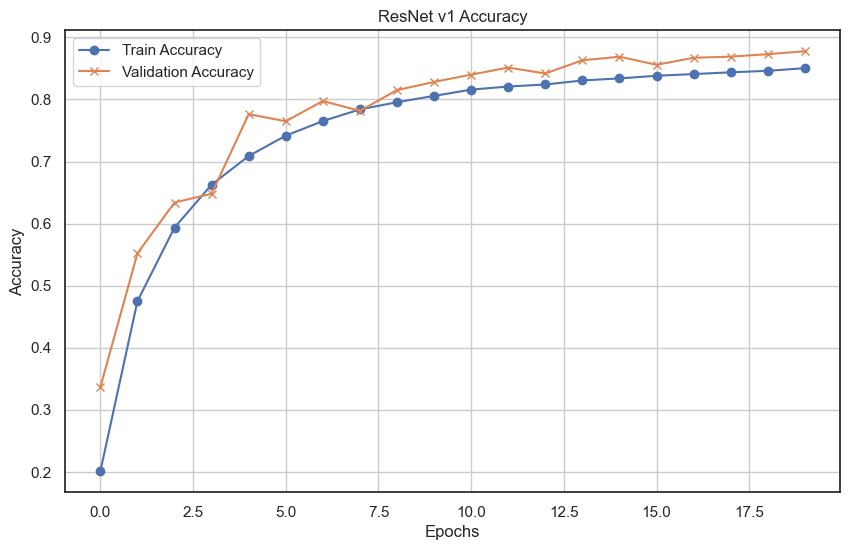

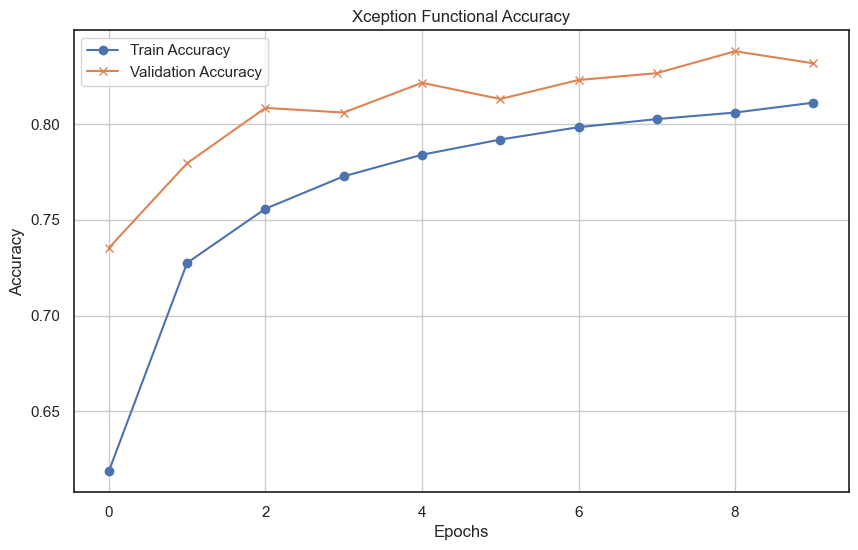

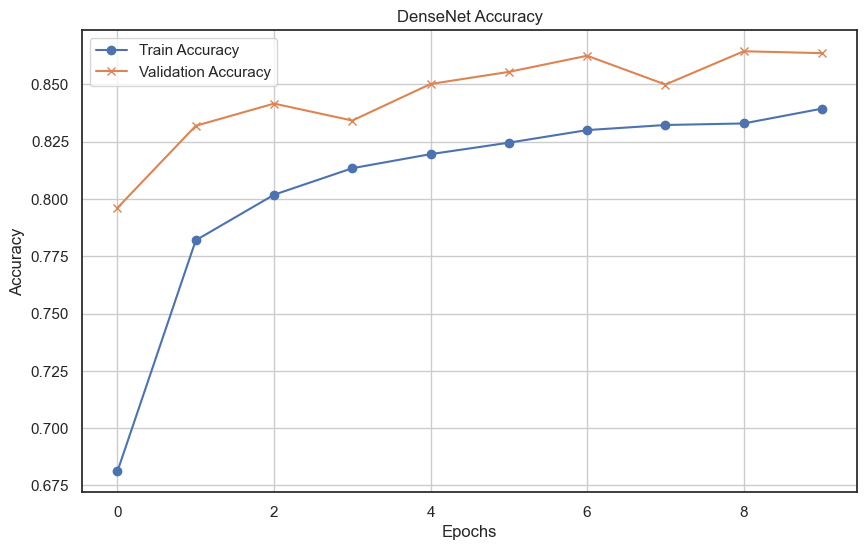

In [132]:
def plot_accuracy(history, model_name):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy(history_model1, 'ResNet v1')
plot_accuracy(historyFunXception, 'Xception Functional')
plot_accuracy(historyDense, 'DenseNet')